# Laboratory #06 : Image Classification using CNN

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

**Remember this is a graded exercise.**

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Create reusable functions where ever possible, so that the code could be reused at different places.
*   Use will have to mount your drive if you need to access images.

---

# **Colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

In [1]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
import pandas as pd
import tensorflow as tf

from matplotlib import pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.backend import clear_session
from sklearn.metrics import confusion_matrix

STRING_LABELS = ["planes", "car", "bird", "cat", "deer", "dog", "frog", "horse", "boat", "truck"]

print(tf.test.is_built_with_cuda())
print(tf.config.list_physical_devices('GPU'))

True
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
def plotImages(images, grid=(2, 2), figsize=(15, 9), **kwargs):
    f, ax = plt.subplots(grid[0], grid[1], figsize=figsize)
    for imageIdx, (title, image) in enumerate(images.items()):
        if grid[0] == 1:
            ax[imageIdx].set_title(title)
            ax[imageIdx].imshow(image, **kwargs)
            ax[imageIdx].axis('off')
        else:
            ax[imageIdx//grid[0]][imageIdx%grid[1]].set_title(title)
            ax[imageIdx//grid[0]][imageIdx%grid[1]].imshow(image, **kwargs)
            ax[imageIdx//grid[0]][imageIdx%grid[1]].axis('off')
    return f, ax

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [3]:
# solution
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape)

(50000, 32, 32, 3)


In [4]:
random_images = {}
for label in np.unique(y_train):
    mask = (y_train == label).flatten()
    x_class = x_train[mask]
    class_images = x_class[np.random.choice(x_class.shape[0], 10, replace=False), :]
    for i, image in enumerate(class_images):
        random_images[f"label:{label} ex{i+1}"] = image

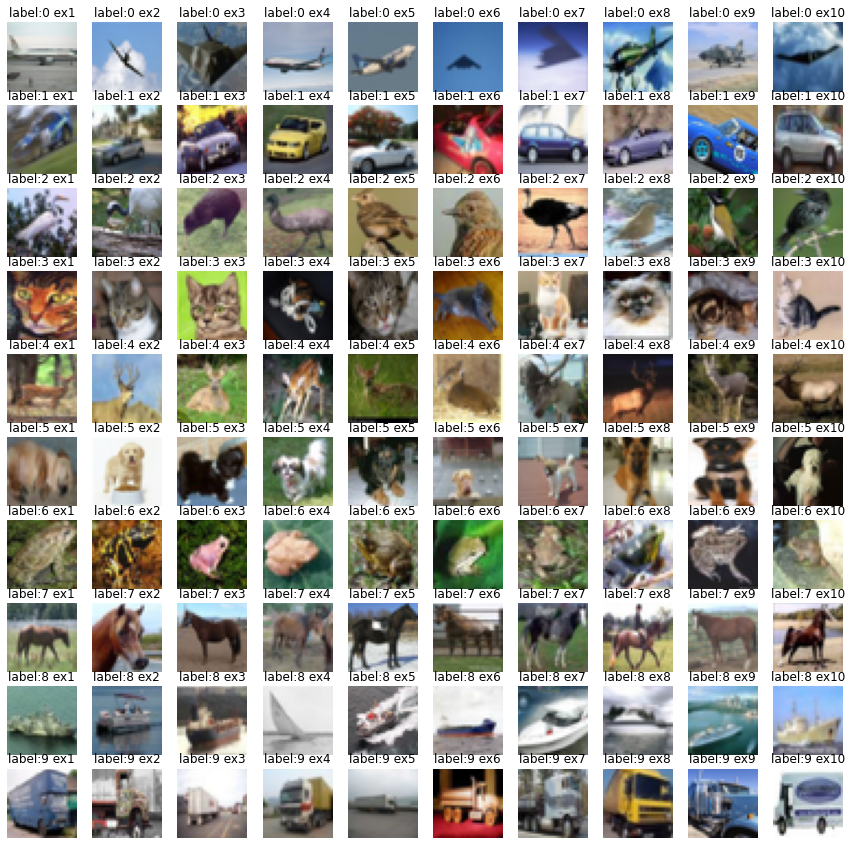

In [5]:
plotImages(random_images, grid=(10,10), figsize=(15,15))
plt.show()

In [6]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


## Define the following model (same as the one in tutorial)

**For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer. Use the input as (32,32,3). The filter maps can then be flattened to provide features to the classifier. Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).**

In [7]:
# solution
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7200)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               720100    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 722,006
Trainable params: 722,006
Non-trainable params: 0
_________________________________________________________________


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 100 epochs with a batch size of 32.

In [9]:
# solution
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics = ['accuracy'])

In [10]:
history_baseline = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_split=0.1)

Epoch 1/100
1407/1407 [==============================] - 3s 2ms/step - loss: 1.8303 - accuracy: 0.3459 - val_loss: 1.6789 - val_accuracy: 0.3890
Epoch 2/100
1407/1407 [==============================] - 3s 2ms/step - loss: 1.4952 - accuracy: 0.4698 - val_loss: 1.4523 - val_accuracy: 0.4762
Epoch 3/100
1407/1407 [==============================] - 3s 2ms/step - loss: 1.3387 - accuracy: 0.5252 - val_loss: 1.3436 - val_accuracy: 0.5252
Epoch 4/100
1407/1407 [==============================] - 3s 2ms/step - loss: 1.2407 - accuracy: 0.5636 - val_loss: 1.3928 - val_accuracy: 0.5024
Epoch 5/100
1407/1407 [==============================] - 3s 2ms/step - loss: 1.1748 - accuracy: 0.5893 - val_loss: 1.2290 - val_accuracy: 0.5746
Epoch 6/100
1407/1407 [==============================] - 3s 2ms/step - loss: 1.1158 - accuracy: 0.6090 - val_loss: 1.2696 - val_accuracy: 0.5624
Epoch 7/100
1407/1407 [==============================] - 3s 2ms/step - loss: 1.0692 - accuracy: 0.6263 - val_loss: 1.2167 - val_ac

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 100 epochs with a batch size of 32. We will use VGG model as the architecture.

**Stack two convolutional layers with 32 filters, each of 3 x 3 followed by max pooling layer. Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. For all the layers, use ReLU activation function. Use same padding for the layers to ensure that the height and width of each layer output matches the input**


In [11]:
clear_session()

In [12]:
# solution
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 814,378
Trainable params: 814,378
Non-trainable params: 0
__________________________________________________

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 100 epochs with a batch size of 32.

In [14]:
# solution
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics = ['accuracy'])

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.
 

In [15]:
# solution
history_vgg = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_split=0.1)

Epoch 1/100
1407/1407 [==============================] - 5s 3ms/step - loss: 1.6735 - accuracy: 0.4004 - val_loss: 1.4898 - val_accuracy: 0.4540
Epoch 2/100
1407/1407 [==============================] - 4s 3ms/step - loss: 1.3263 - accuracy: 0.5316 - val_loss: 1.4133 - val_accuracy: 0.5022
Epoch 3/100
1407/1407 [==============================] - 4s 3ms/step - loss: 1.1637 - accuracy: 0.5907 - val_loss: 1.4374 - val_accuracy: 0.5190
Epoch 4/100
1407/1407 [==============================] - 4s 3ms/step - loss: 1.0528 - accuracy: 0.6308 - val_loss: 1.0741 - val_accuracy: 0.6250
Epoch 5/100
1407/1407 [==============================] - 4s 3ms/step - loss: 0.9608 - accuracy: 0.6665 - val_loss: 1.0236 - val_accuracy: 0.6420
Epoch 6/100
1407/1407 [==============================] - 4s 3ms/step - loss: 0.8848 - accuracy: 0.6933 - val_loss: 1.1030 - val_accuracy: 0.6238
Epoch 7/100
1407/1407 [==============================] - 4s 3ms/step - loss: 0.8146 - accuracy: 0.7166 - val_loss: 1.2423 - val_ac

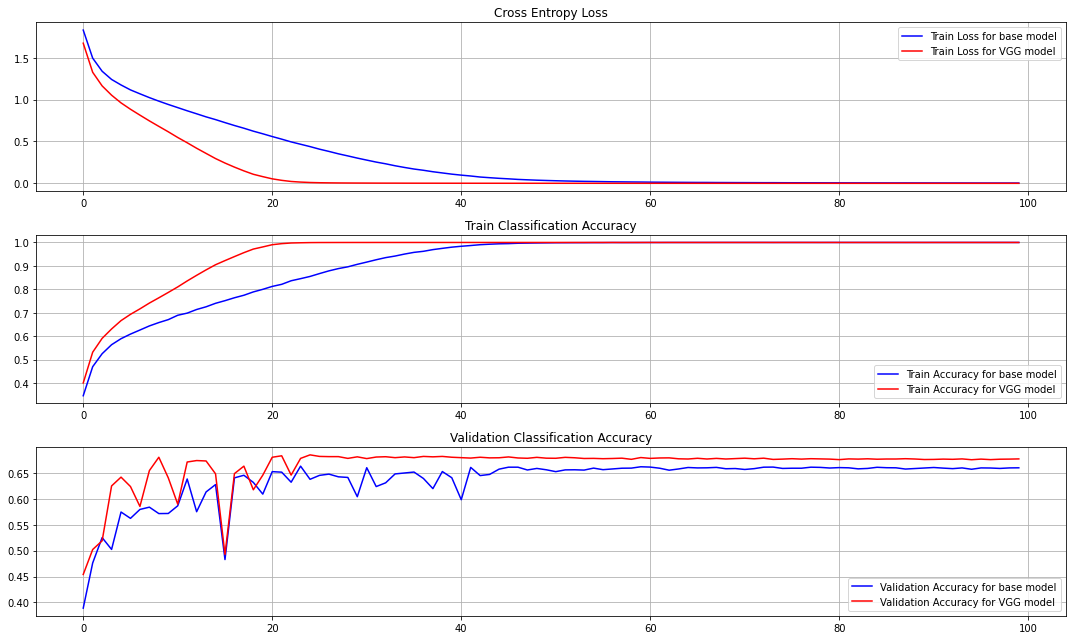

In [16]:
plt.figure(figsize=(15, 9))

plt.subplot(311)
plt.title('Cross Entropy Loss')
plt.plot(history_baseline.history['loss'], color='blue', label='Train Loss for base model')
plt.plot(history_vgg.history['loss'], color='red', label='Train Loss for VGG model')
plt.legend()
plt.grid('on')

plt.subplot(312)
plt.title('Train Classification Accuracy')
plt.plot(history_baseline.history['accuracy'], color='blue', label='Train Accuracy for base model')
plt.plot(history_vgg.history['accuracy'], color='red', label='Train Accuracy for VGG model')
plt.legend()
plt.grid('on')

plt.subplot(313)
plt.title('Validation Classification Accuracy')
plt.plot(history_baseline.history['val_accuracy'], color='blue', label='Validation Accuracy for base model')
plt.plot(history_vgg.history['val_accuracy'], color='red', label='Validation Accuracy for VGG model')
plt.legend()
plt.grid('on')

plt.tight_layout()
plt.show()

**Solution**

The Vgg deeper model performs better (in the validation set) and it converges faster than the first proposed solution. The mail difference between the models is a second convolutional layer and a bigger hidden layer before the final classifier that will allow the network to have an embedding of 28 more activation values.

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


In [17]:
# solution
predictions = model.predict(x_test)
print(predictions.shape)
predictions = np.argmax(predictions, axis=1)

(10000, 10)


In [18]:
gt = np.argmax(y_test, axis=1)
confmat = confusion_matrix(gt, predictions)
pd.DataFrame(confmat, columns=STRING_LABELS, index=STRING_LABELS)

,planes,car,bird,cat,deer,dog,frog,horse,boat,truck
planes,721,17,58,24,32,7,13,13,70,45
car,18,778,11,11,4,9,12,2,49,106
bird,71,7,569,75,82,67,64,35,22,8
cat,29,21,78,456,70,194,77,38,17,20
deer,35,2,79,74,627,42,55,73,9,4
dog,17,7,91,190,47,540,28,64,10,6
frog,7,12,53,72,53,30,743,13,7,10
horse,23,14,36,44,68,62,10,711,7,25
boat,66,44,13,23,14,11,13,3,770,43
truck,48,105,11,18,6,11,12,24,38,727


**Solution**

From the confusion matrix we can see that the following pairs of classes have some considerable misclassifications:

- car and truck: as both are 4 wheel vehicles and the backgrounds are similar it is comprehensible that they are confused.
- cat and dog: as both are 4 legged animals with similar textures, shapes and backgrounds, it is comprehensible that they are confused.
- plane and bird: confused because of the sky in the background and the wings.
- plane and boat: they save similar metallic textures and the backgound for both is usually blue (sky and sea).
- deer and bird: background of green forests or trees may cause this confusion.
- deer and horse: similar texture, anatomy and background may cause the confusion.
- frog and bird: nature background or sky may cause the confusion. 

*    Print the test accuracy for the trained model.

In [19]:
# solution
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 2ms/step - loss: 2.9812 - accuracy: 0.6642
Test accuracy: 0.6642000079154968


## Define the complete VGG architecture.

**Stack two convolutional layers with 32 filters, each of 3 x 3 followed by max pooling layer. Stack two more convolutional layers with 64 filters, each of 3 x 3, followed by max pooling, follwed by two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling. Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. For all the layers, use ReLU activation function. Use same padding for the layers to ensure that the height and width of each layer output matches the input**

In [20]:
# solution
clear_session()
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3), padding="same"))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3), padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3), padding="same"))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3), padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3), padding="same"))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3), padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         7

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 100 epochs with a batch size of 32.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [22]:
# solution
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics = ['accuracy'])

In [23]:
history = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_split=0.1)

Epoch 1/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.6981 - accuracy: 0.3857 - val_loss: 1.9149 - val_accuracy: 0.3570
Epoch 2/100
1407/1407 [==============================] - 8s 5ms/step - loss: 1.3372 - accuracy: 0.5225 - val_loss: 1.4324 - val_accuracy: 0.4904
Epoch 3/100
1407/1407 [==============================] - 8s 5ms/step - loss: 1.1379 - accuracy: 0.5971 - val_loss: 1.1192 - val_accuracy: 0.6022
Epoch 4/100
1407/1407 [==============================] - 8s 5ms/step - loss: 0.9932 - accuracy: 0.6501 - val_loss: 1.1365 - val_accuracy: 0.5928
Epoch 5/100
1407/1407 [==============================] - 8s 5ms/step - loss: 0.8756 - accuracy: 0.6949 - val_loss: 1.0029 - val_accuracy: 0.6530
Epoch 6/100
1407/1407 [==============================] - 8s 5ms/step - loss: 0.7791 - accuracy: 0.7278 - val_loss: 1.7591 - val_accuracy: 0.4770
Epoch 7/100
1407/1407 [==============================] - 8s 5ms/step - loss: 0.6971 - accuracy: 0.7575 - val_loss: 0.9788 - val_ac

In [24]:
predictions = np.argmax(model.predict(x_test), axis=1)
gt = np.argmax(y_test, axis=1)
confmat = confusion_matrix(gt, predictions)
pd.DataFrame(confmat, columns=STRING_LABELS, index=STRING_LABELS)

,planes,car,bird,cat,deer,dog,frog,horse,boat,truck
planes,788,12,41,24,16,10,11,9,62,27
car,20,859,6,9,2,3,8,3,19,71
bird,62,8,644,54,76,59,53,25,10,9
cat,26,9,60,563,67,151,59,41,4,20
deer,14,2,75,67,698,34,45,55,7,3
dog,12,5,48,164,36,648,24,45,9,9
frog,7,2,38,43,32,35,823,7,8,5
horse,9,2,26,37,56,37,6,810,6,11
boat,47,29,12,18,5,6,7,2,854,20
truck,35,77,13,14,3,8,7,15,21,807


In [25]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 2.8363 - accuracy: 0.7494
Test accuracy: 0.7494000196456909


# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Solution**

- Because if there is no nonlinearity functions the network would behave as a simple Linear layer. Also it allows the network to map non-linear patterns that are present in the data. In our case, the ReLU activation function is used because of its behaviour with negative inputs. As the inputs are the correlations in the images, it will filter out the images with more negative correlation values.

- Sigmoid activation is typically used when the ouput of the network is a numerical value. However, in a classification task, the ouput of the network is the membership value of the input data to each of the output classes. The softmax activation function reduces the difference between the membership of the class which its value is maximum and the rest of the classes. Additionally, as we are dealing with probabilities in classification, it is mandatory for the sum of all values in the output tensor to sum 1. The sigmoid function does not guarratee this condition to be satisfied while softmax achieves that with the mathematical operation:

$softmax(x)_i = \frac{e^{x_i}}{\sum_{j} e^{x_j}}$

- Binary cross entropy classifies two classe while categorical cross entropy is not limited to how many classes your model can classify. Binary cross entropy is just a special case of categorical cross entropy. The equation for binary cross entropy loss is the exact equation for categorical cross entropy loss with one output node.


---

## **End of P6: Image Classification using CNN**
Deadline for P6 submission in CampusVirtual is: **Thursday, the 19th of November, 2020**